In [1]:
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt
plt.ion()

import seaborn
import numpy as np

In [2]:
location = pd.read_csv('location1.csv')
location

station_id            city state                 region
0   USW00014942      Des Moines    IA         Midwest Region
1   USW00013988         Wichita    KS         Midwest Region
2   USW00003927   Oklahoma City    OK         Midwest Region
3   USW00023047        Amarillo    TX         Midwest Region
4   USW00014936         Lincoln    NE         Midwest Region
5   USW00014929     Sioux Falls    SD         Midwest Region
6   USW00014922     Minneapolis    MN         Midwest Region
7   USW00014837         Madison    WI         Midwest Region
8   USW00014856    Grand Rapids    MI         Midwest Region
9   USW00093819    Indianapolis    IN         Midwest Region
10  USW00014932        Bismarck    ND    Great Plains Region
11  USW00014933          Pierre    SD    Great Plains Region
12  USW00024012        Cheyenne    WY    Great Plains Region
13  USW00024151        Billings    MT    Great Plains Region
14  USW00013976          Topeka    KS    Great Plains Region
15  USW00024090      Rapid City    SD    Great Plains Region
16  USW00014929           Fargo    ND    Great Plains Region
17  USC00246020        Missoula    MT    Great Plains Region
18  USW00014936         Lincoln    NE    Great Plains Region
19  USW00003927   Wichita Falls    TX    Great Plains Region
20  USW00003017          Denver    CO  Rocky Mountain Region
21  USC00294879        Santa Fe    NM  Rocky Mountain Region
22  USW00024018          Casper    WY  Rocky Mountain Region
23  USC00470717         Bozeman    MT  Rocky Mountain Region
24  USC00054391         Durango    CO  Rocky Mountain Region
25  USW00023155       Flagstaff    AZ  Rocky Mountain Region
26  USW00024127  Salt Lake City    UT  Rocky Mountain Region
27  USW00023050     Albuquerque    NM  Rocky Mountain Region
28  USC00488060         Laramie    WY  Rocky Mountain Region
29  USW00024127           Boise    ID  Rocky Mountain Region
30  USW00014739          Boston    MA          Coastal Areas
31  USW00014765      Providence    RI          Coastal Areas
32  USW00093720   Atlantic City    NJ          Coastal Areas
33  USW00014606        Portland    ME          Coastal Areas
34  USW00023272   San Francisco    CA          Coastal Areas
35  USW00094290         Seattle    WA          Coastal Areas
36  USS0019G07S        Honolulu    HI          Coastal Areas
37  USW00023188       San Diego    CA          Coastal Areas
38  USW00013881      Charleston    SC          Coastal Areas
39  USW00026451       Anchorage    AK          Coastal Areas

In [3]:
station_id = ''
for st_id in location.station_id:
    station_id = station_id + st_id + ','
station_id = station_id[:-1]
station_id

'USW00014942,USW00013988,USW00003927,USW00023047,USW00014936,USW00014929,USW00014922,USW00014837,USW00014856,USW00093819,USW00014932,USW00014933,USW00024012,USW00024151,USW00013976,USW00024090,USW00014929,USC00246020,USW00014936,USW00003927,USW00003017,USC00294879,USW00024018,USC00470717,USC00054391,USW00023155,USW00024127,USW00023050,USC00488060,USW00024127,USW00014739,USW00014765,USW00093720,USW00014606,USW00023272,USW00094290,USS0019G07S,USW00023188,USW00013881,USW00026451'

In [4]:
from datetime import datetime, timedelta
yesterday = datetime.now() - timedelta(1)                                                                                                                                                                              
end_date = datetime.strftime(yesterday, '%Y-%m-%d')
end_date

'2023-05-08'

In [5]:
from c_ncei_data_service_api import c_ncei_data_service_api

api_result = c_ncei_data_service_api('daily-summaries', 'TSUN, TAVG, TMAX, TMIN, AWND, WDF2, WDF5, WSF2, WSF5, PGTM, FMTM', station_id, '2010-01-01', end_date, '90,-180,-90,180')
# print(api_result.get_data())
api_result.write_data_file('C:\\Users\\spark\\Jupyter Books\\Data mining\\Project\\weather_data.csv')

In [6]:
weather = pd.read_csv('weather_data.csv')
weather.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
AWND         float64
FMTM         float64
PGTM         float64
TAVG         float64
TMAX         float64
TMIN         float64
TSUN         float64
WDF2         float64
WDF5         float64
WSF2         float64
WSF5         float64
dtype: object

In [7]:
# altitude_mean_meters = coffee_df.altitude_mean_meters.fillna(coffee_df.altitude_mean_meters.mean())
import numpy as np

weather = weather.drop('TSUN', axis = 1)
stations = weather.STATION.unique()
# stations = np.asarray(stations, dtype=np.str)
# stations
for station in stations:
    weather.loc[(weather['STATION'] == station) & (weather['AWND'].isna()), 'AWND'] = weather.loc[weather['STATION'] == station, 'AWND'].mean()
    weather.loc[(weather['STATION'] == station) & (weather['FMTM'].isna()), 'FMTM'] = weather.loc[weather['STATION'] == station, 'FMTM'].mean()
    weather.loc[(weather['STATION'] == station) & (weather['PGTM'].isna()), 'PGTM'] = weather.loc[weather['STATION'] == station, 'PGTM'].mean()
    weather.loc[(weather['STATION'] == station) & (weather['TAVG'].isna()), 'TAVG'] = weather.loc[weather['STATION'] == station, 'TAVG'].mean()
    weather.loc[(weather['STATION'] == station) & (weather['TMAX'].isna()), 'TMAX'] = weather.loc[weather['STATION'] == station, 'TMAX'].mean()
    weather.loc[(weather['STATION'] == station) & (weather['TMIN'].isna()), 'TMIN'] = weather.loc[weather['STATION'] == station, 'TMIN'].mean()
    weather.loc[(weather['STATION'] == station) & (weather['WDF2'].isna()), 'WDF2'] = weather.loc[weather['STATION'] == station, 'WDF2'].mean()
    weather.loc[(weather['STATION'] == station) & (weather['WDF5'].isna()), 'WDF5'] = weather.loc[weather['STATION'] == station, 'WDF5'].mean()
    weather.loc[(weather['STATION'] == station) & (weather['WSF2'].isna()), 'WSF2'] = weather.loc[weather['STATION'] == station, 'WSF2'].mean()
    weather.loc[(weather['STATION'] == station) & (weather['WSF5'].isna()), 'WSF5'] = weather.loc[weather['STATION'] == station, 'WSF5'].mean()

In [8]:
weather

STATION                              NAME  LATITUDE  LONGITUDE  \
0       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
1       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
2       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
3       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
4       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
...             ...                               ...       ...        ...   
150747  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   
150748  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   
150749  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   
150750  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   
150751  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   

        ELEVATION        DATE      AWND         FMTM         PGTM       TAVG  \
0           298.8  2010-01-01  3.800000  1311.000000  1159.000000  11.426918   
1           298.8  2010-01-02  1.700000   222.000000  1950.000000  11.426918   
2           298.8  2010-01-03  2.400000  1547.000000  1558.000000  11.426918   
3           298.8  2010-01-04  2.700000  1606.000000  1605.000000  11.426918   
4           298.8  2010-01-05  1.300000  2219.000000  2221.000000  11.426918   
...           ...         ...       ...          ...          ...        ...   
150747      222.6  2023-05-03  4.300000  1836.559043  1424.130094  14.700000   
150748      222.6  2023-05-04  2.600000  1836.559043  1424.130094  14.800000   
150749      222.6  2023-05-05  2.500000  1836.559043  1424.130094  17.200000   
150750      222.6  2023-05-06  2.773789  1836.559043  1424.130094  18.900000   
150751      222.6  2023-05-07  2.773789  1836.559043  1424.130094  18.800000   

             TMAX       TMIN        WDF2        WDF5       WSF2       WSF5  
0      -11.100000 -23.300000  350.000000  330.000000   8.000000  10.300000  
1      -16.700000 -25.600000   10.000000   30.000000   5.400000   7.200000  
2      -13.300000 -20.600000   10.000000   20.000000   5.400000   5.800000  
3      -15.600000 -28.900000   10.000000   10.000000   4.000000   4.500000  
4      -13.300000 -26.700000  150.000000  140.000000   3.600000   4.000000  
...           ...        ...         ...         ...        ...        ...  
150747  21.100000   8.900000  310.000000  270.000000  10.700000  15.700000  
150748  22.800000   6.700000  270.000000   10.000000   5.800000   8.100000  
150749  23.900000  11.700000  220.000000  230.000000   5.400000   6.300000  
150750  22.731315  10.579499  180.985222  174.847611   7.117939   9.909946  
150751  22.731315  10.579499  180.985222  174.847611   7.117939   9.909946  

[150752 rows x 16 columns]

In [9]:
cols = ['city', 'state', 'region']
location['combined'] = [[e for e in row if e==e] for row in location[cols].values.tolist()]
location

station_id            city state                 region  \
0   USW00014942      Des Moines    IA         Midwest Region   
1   USW00013988         Wichita    KS         Midwest Region   
2   USW00003927   Oklahoma City    OK         Midwest Region   
3   USW00023047        Amarillo    TX         Midwest Region   
4   USW00014936         Lincoln    NE         Midwest Region   
5   USW00014929     Sioux Falls    SD         Midwest Region   
6   USW00014922     Minneapolis    MN         Midwest Region   
7   USW00014837         Madison    WI         Midwest Region   
8   USW00014856    Grand Rapids    MI         Midwest Region   
9   USW00093819    Indianapolis    IN         Midwest Region   
10  USW00014932        Bismarck    ND    Great Plains Region   
11  USW00014933          Pierre    SD    Great Plains Region   
12  USW00024012        Cheyenne    WY    Great Plains Region   
13  USW00024151        Billings    MT    Great Plains Region   
14  USW00013976          Topeka    KS    Great Plains Region   
15  USW00024090      Rapid City    SD    Great Plains Region   
16  USW00014929           Fargo    ND    Great Plains Region   
17  USC00246020        Missoula    MT    Great Plains Region   
18  USW00014936         Lincoln    NE    Great Plains Region   
19  USW00003927   Wichita Falls    TX    Great Plains Region   
20  USW00003017          Denver    CO  Rocky Mountain Region   
21  USC00294879        Santa Fe    NM  Rocky Mountain Region   
22  USW00024018          Casper    WY  Rocky Mountain Region   
23  USC00470717         Bozeman    MT  Rocky Mountain Region   
24  USC00054391         Durango    CO  Rocky Mountain Region   
25  USW00023155       Flagstaff    AZ  Rocky Mountain Region   
26  USW00024127  Salt Lake City    UT  Rocky Mountain Region   
27  USW00023050     Albuquerque    NM  Rocky Mountain Region   
28  USC00488060         Laramie    WY  Rocky Mountain Region   
29  USW00024127           Boise    ID  Rocky Mountain Region   
30  USW00014739          Boston    MA          Coastal Areas   
31  USW00014765      Providence    RI          Coastal Areas   
32  USW00093720   Atlantic City    NJ          Coastal Areas   
33  USW00014606        Portland    ME          Coastal Areas   
34  USW00023272   San Francisco    CA          Coastal Areas   
35  USW00094290         Seattle    WA          Coastal Areas   
36  USS0019G07S        Honolulu    HI          Coastal Areas   
37  USW00023188       San Diego    CA          Coastal Areas   
38  USW00013881      Charleston    SC          Coastal Areas   
39  USW00026451       Anchorage    AK          Coastal Areas   

                                       combined  
0              [Des Moines, IA, Midwest Region]  
1                 [Wichita, KS, Midwest Region]  
2           [Oklahoma City, OK, Midwest Region]  
3                [Amarillo, TX, Midwest Region]  
4                 [Lincoln, NE, Midwest Region]  
5             [Sioux Falls, SD, Midwest Region]  
6             [Minneapolis, MN, Midwest Region]  
7                 [Madison, WI, Midwest Region]  
8            [Grand Rapids, MI, Midwest Region]  
9            [Indianapolis, IN, Midwest Region]  
10          [Bismarck, ND, Great Plains Region]  
11            [Pierre, SD, Great Plains Region]  
12          [Cheyenne, WY, Great Plains Region]  
13          [Billings, MT, Great Plains Region]  
14            [Topeka, KS, Great Plains Region]  
15        [Rapid City, SD, Great Plains Region]  
16             [Fargo, ND, Great Plains Region]  
17          [Missoula, MT, Great Plains Region]  
18           [Lincoln, NE, Great Plains Region]  
19     [Wichita Falls, TX, Great Plains Region]  
20          [Denver, CO, Rocky Mountain Region]  
21        [Santa Fe, NM, Rocky Mountain Region]  
22          [Casper, WY, Rocky Mountain Region]  
23         [Bozeman, MT, Rocky Mountain Region]  
24         [Durango, CO, Rocky Mountain Region]  
25       [Flagstaff, AZ, Rocky Mountain Region]  
26  [Salt Lake City, UT, Rocky

In [10]:
location_dict = dict(zip(location.station_id, location.combined))
location_dict

{'USW00014942': ['Des Moines', 'IA', 'Midwest Region'],
 'USW00013988': ['Wichita', 'KS', 'Midwest Region'],
 'USW00003927': ['Wichita Falls', 'TX', 'Great Plains Region'],
 'USW00023047': ['Amarillo', 'TX', 'Midwest Region'],
 'USW00014936': ['Lincoln', 'NE', 'Great Plains Region'],
 'USW00014929': ['Fargo', 'ND', 'Great Plains Region'],
 'USW00014922': ['Minneapolis', 'MN', 'Midwest Region'],
 'USW00014837': ['Madison', 'WI', 'Midwest Region'],
 'USW00014856': ['Grand Rapids', 'MI', 'Midwest Region'],
 'USW00093819': ['Indianapolis', 'IN', 'Midwest Region'],
 'USW00014932': ['Bismarck', 'ND', 'Great Plains Region'],
 'USW00014933': ['Pierre', 'SD', 'Great Plains Region'],
 'USW00024012': ['Cheyenne', 'WY', 'Great Plains Region'],
 'USW00024151': ['Billings', 'MT', 'Great Plains Region'],
 'USW00013976': ['Topeka', 'KS', 'Great Plains Region'],
 'USW00024090': ['Rapid City', 'SD', 'Great Plains Region'],
 'USC00246020': ['Missoula', 'MT', 'Great Plains Region'],
 'USW00003017': ['Denv

In [11]:
location = location.rename(columns = {'station_id':'STATION'})
# location
# weather.join(location.drop(['combined'], axis = 1))
# weather = weather.STATION.replace(location.set_index('STATION')['city','state','region'])
columns = weather.columns
columns = columns.append(location.columns)
res = [*set(columns)]
# out = (weather.merge(location, left_on='STATION', right_on='STATION')
#           .reindex(columns=res))
city = weather.STATION.replace(location.set_index('STATION')['city'])
weather['city'] = city
state = weather.STATION.replace(location.set_index('STATION')['state'])
weather['state'] = state
region = weather.STATION.replace(location.set_index('STATION')['region'])
weather['region'] = region
weather

STATION                              NAME  LATITUDE  LONGITUDE  \
0       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
1       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
2       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
3       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
4       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
...             ...                               ...       ...        ...   
150747  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   
150748  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   
150749  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   
150750  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   
150751  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   

        ELEVATION        DATE      AWND         FMTM         PGTM       TAVG  \
0           298.8  2010-01-01  3.800000  1311.000000  1159.000000  11.426918   
1           298.8  2010-01-02  1.700000   222.000000  1950.000000  11.426918   
2           298.8  2010-01-03  2.400000  1547.000000  1558.000000  11.426918   
3           298.8  2010-01-04  2.700000  1606.000000  1605.000000  11.426918   
4           298.8  2010-01-05  1.300000  2219.000000  2221.000000  11.426918   
...           ...         ...       ...          ...          ...        ...   
150747      222.6  2023-05-03  4.300000  1836.559043  1424.130094  14.700000   
150748      222.6  2023-05-04  2.600000  1836.559043  1424.130094  14.800000   
150749      222.6  2023-05-05  2.500000  1836.559043  1424.130094  17.200000   
150750      222.6  2023-05-06  2.773789  1836.559043  1424.130094  18.900000   
150751      222.6  2023-05-07  2.773789  1836.559043  1424.130094  18.800000   

             TMAX       TMIN        WDF2        WDF5       WSF2       WSF5  \
0      -11.100000 -23.300000  350.000000  330.000000   8.000000  10.300000   
1      -16.700000 -25.600000   10.000000   30.000000   5.400000   7.200000   
2      -13.300000 -20.600000   10.000000   20.000000   5.400000   5.800000   
3      -15.600000 -28.900000   10.000000   10.000000   4.000000   4.500000   
4      -13.300000 -26.700000  150.000000  140.000000   3.600000   4.000000   
...           ...        ...         ...         ...        ...        ...   
150747  21.100000   8.900000  310.000000  270.000000  10.700000  15.700000   
150748  22.800000   6.700000  270.000000   10.000000   5.800000   8.100000   
150749  23.900000  11.700000  220.000000  230.000000   5.400000   6.300000   
150750  22.731315  10.579499  180.985222  174.847611   7.117939   9.909946   
150751  22.731315  10.579499  180.985222  174.847611   7.117939   9.909946   

              city state          region  
0       Des Moines    IA  Midwest Region  
1       Des Moines    IA  Midwest Region  
2       Des Moines    IA  Midwest Region  
3       Des Moines    IA  Midwest Region  
4       Des Moines    IA  Midwest Region  
...            ...   ...             ...  
150747  Charleston    SC   Coastal Areas  
150748  Charleston    SC   Coastal Areas  
150749  Charleston    SC   Coastal Areas  
150750  Charleston    SC   Coastal Areas  
150751  Charleston    SC   Coastal Areas  

[150752 rows x 19 columns]

In [12]:
weather["th_power"] = 16/27*0.5*3.142*1.293*80*80/4*weather["AWND"]*weather["AWND"]*weather["AWND"]
weather

STATION                              NAME  LATITUDE  LONGITUDE  \
0       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
1       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
2       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
3       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
4       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
...             ...                               ...       ...        ...   
150747  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   
150748  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   
150749  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   
150750  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   
150751  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   

        ELEVATION        DATE      AWND         FMTM         PGTM       TAVG  \
0           298.8  2010-01-01  3.800000  1311.000000  1159.000000  11.426918   
1           298.8  2010-01-02  1.700000   222.000000  1950.000000  11.426918   
2           298.8  2010-01-03  2.400000  1547.000000  1558.000000  11.426918   
3           298.8  2010-01-04  2.700000  1606.000000  1605.000000  11.426918   
4           298.8  2010-01-05  1.300000  2219.000000  2221.000000  11.426918   
...           ...         ...       ...          ...          ...        ...   
150747      222.6  2023-05-03  4.300000  1836.559043  1424.130094  14.700000   
150748      222.6  2023-05-04  2.600000  1836.559043  1424.130094  14.800000   
150749      222.6  2023-05-05  2.500000  1836.559043  1424.130094  17.200000   
150750      222.6  2023-05-06  2.773789  1836.559043  1424.130094  18.900000   
150751      222.6  2023-05-07  2.773789  1836.559043  1424.130094  18.800000   

             TMAX       TMIN        WDF2        WDF5       WSF2       WSF5  \
0      -11.100000 -23.300000  350.000000  330.000000   8.000000  10.300000   
1      -16.700000 -25.600000   10.000000   30.000000   5.400000   7.200000   
2      -13.300000 -20.600000   10.000000   20.000000   5.400000   5.800000   
3      -15.600000 -28.900000   10.000000   10.000000   4.000000   4.500000   
4      -13.300000 -26.700000  150.000000  140.000000   3.600000   4.000000   
...           ...        ...         ...         ...        ...        ...   
150747  21.100000   8.900000  310.000000  270.000000  10.700000  15.700000   
150748  22.800000   6.700000  270.000000   10.000000   5.800000   8.100000   
150749  23.900000  11.700000  220.000000  230.000000   5.400000   6.300000   
150750  22.731315  10.579499  180.985222  174.847611   7.117939   9.909946   
150751  22.731315  10.579499  180.985222  174.847611   7.117939   9.909946   

              city state          region       th_power  
0       Des Moines    IA  Midwest Region  105682.164827  
1       Des Moines    IA  Midwest Region    9462.320961  
2       Des Moines    IA  Midwest Region   26624.694682  
3       Des Moines    IA  Midwest Region   37908.989107  
4       Des Moines    IA  Midwest Region    4231.369663  
...            ...   ...             ...            ...  
150747  Charleston    SC   Coastal Areas  153128.587967  
150748  Charleston    SC   Coastal Areas   33850.957301  
150749  Charleston    SC   Coastal Areas   30093.377778  
150750  Charleston    SC   Coastal Areas   41102.777958  
150751  Charleston    SC   Coastal Areas   41102.777958  

[150752 rows x 20 columns]

In [13]:
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict

# ord_enc = OrdinalEncoder()
# weather["STATION"] = ord_enc.fit_transform(weather[["STATION"]])
# weather["NAME"] = ord_enc.fit_transform(weather[["NAME"]])
# weather["city"] = ord_enc.fit_transform(weather[["city"]])
# weather["state"] = ord_enc.fit_transform(weather[["state"]])
# weather["region"] = ord_enc.fit_transform(weather[["region"]])
# weather["DATE"] = ord_enc.fit_transform(weather[["DATE"]])

# seaborn.heatmap(weather.corr(),
#                 xticklabels=weather.columns,
#                 yticklabels=weather.columns)


In [14]:
# plt.hist(weather['th_power'], range=[0,4000000], bins = 100)
# plt.ticklabel_format(style = 'plain')
# plt.title("Distribution of Theoretical Power")
# plt.xlabel("Power")
# plt.ylabel("Count")

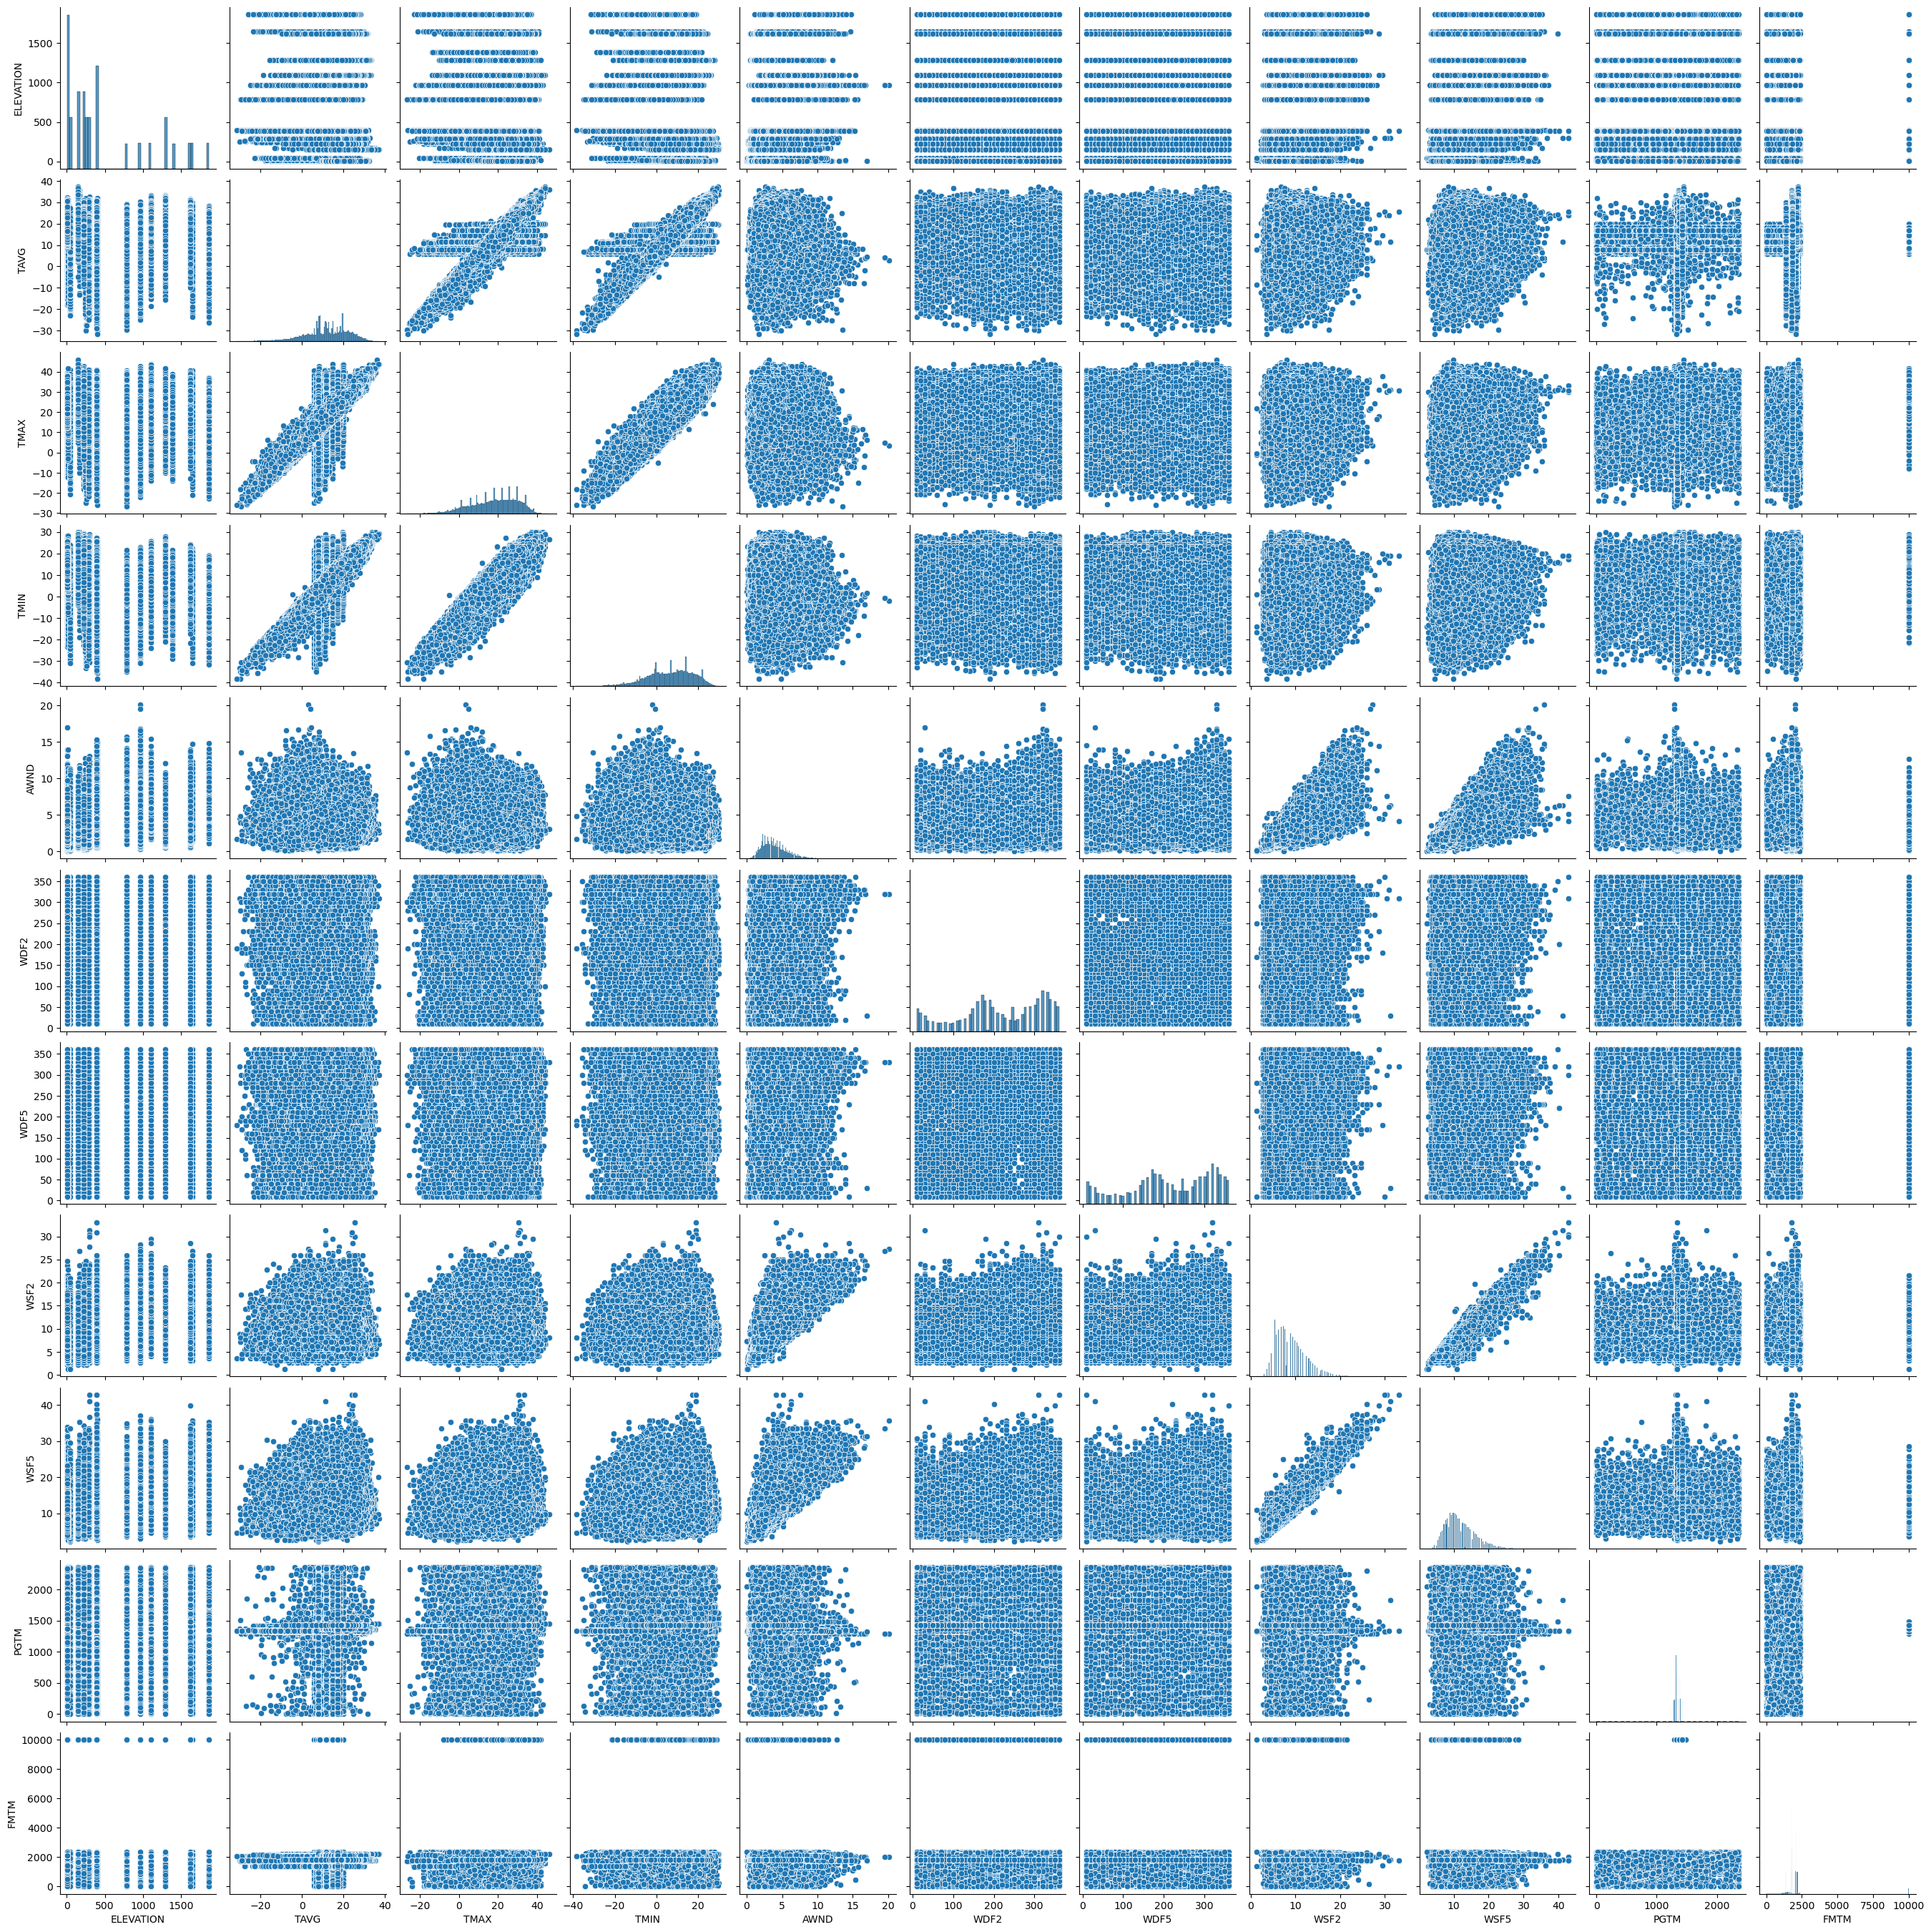

In [15]:
seaborn.pairplot(weather, vars = ['ELEVATION', 'TAVG', 'TMAX', 'TMIN', 'AWND', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'PGTM', 'FMTM']) 


In [16]:
# weather.loc[weather["AWND"] < 3.5, "th_power"] = 0
# weather.loc[weather["AWND"] > 25, "th_power"] = 0  
weather.dtypes


STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
AWND         float64
FMTM         float64
PGTM         float64
TAVG         float64
TMAX         float64
TMIN         float64
WDF2         float64
WDF5         float64
WSF2         float64
WSF5         float64
city          object
state         object
region        object
th_power     float64
dtype: object

Text(0, 0.5, 'Count')

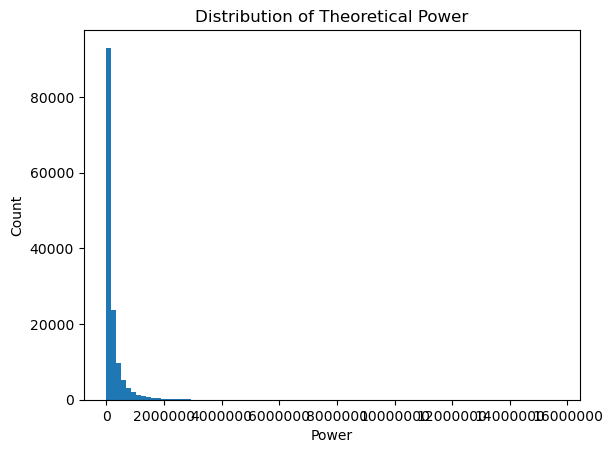

In [17]:
plt.hist(weather['th_power'], bins = 90)
plt.ticklabel_format(style = 'plain')
plt.title("Distribution of Theoretical Power")
plt.xlabel("Power")
plt.ylabel("Count")

In [18]:
power_pctile = np.percentile(weather['AWND'], [20, 40, 60, 80])
power_pctile
# np.nanpercentile(weather['th_power'], 40)
column = weather['AWND']
count = column[column == 0].count()
count

2

In [19]:
weather['power'] = 0
weather['power'] = np.where(weather['th_power'] < power_pctile[0], 1, weather['power'])
weather['power'] = np.where((weather['th_power'] >= power_pctile[0]) & (weather['th_power'] <= power_pctile[1]), 2, weather['power'])
weather['power'] = np.where((weather['th_power'] >= power_pctile[1]) & (weather['th_power'] <= power_pctile[2]), 3, weather['power'])
weather['power'] = np.where((weather['th_power'] > power_pctile[2]) & (weather['th_power'] <= power_pctile[3]), 4, weather['power'])
weather['power'] = np.where(weather['th_power'] > power_pctile[3], 5, weather['power'])
weather

STATION                              NAME  LATITUDE  LONGITUDE  \
0       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
1       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
2       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
3       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
4       USW00014942      OMAHA EPPLEY AIRFIELD, NE US  41.31186  -95.90186   
...             ...                               ...       ...        ...   
150747  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   
150748  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   
150749  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   
150750  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   
150751  USW00013881  CHARLOTTE DOUGLAS AIRPORT, NC US  35.22254  -80.95433   

        ELEVATION        DATE      AWND         FMTM         PGTM       TAVG  \
0           298.8  2010-01-01  3.800000  1311.000000  1159.000000  11.426918   
1           298.8  2010-01-02  1.700000   222.000000  1950.000000  11.426918   
2           298.8  2010-01-03  2.400000  1547.000000  1558.000000  11.426918   
3           298.8  2010-01-04  2.700000  1606.000000  1605.000000  11.426918   
4           298.8  2010-01-05  1.300000  2219.000000  2221.000000  11.426918   
...           ...         ...       ...          ...          ...        ...   
150747      222.6  2023-05-03  4.300000  1836.559043  1424.130094  14.700000   
150748      222.6  2023-05-04  2.600000  1836.559043  1424.130094  14.800000   
150749      222.6  2023-05-05  2.500000  1836.559043  1424.130094  17.200000   
150750      222.6  2023-05-06  2.773789  1836.559043  1424.130094  18.900000   
150751      222.6  2023-05-07  2.773789  1836.559043  1424.130094  18.800000   

        ...       TMIN        WDF2        WDF5       WSF2       WSF5  \
0       ... -23.300000  350.000000  330.000000   8.000000  10.300000   
1       ... -25.600000   10.000000   30.000000   5.400000   7.200000   
2       ... -20.600000   10.000000   20.000000   5.400000   5.800000   
3       ... -28.900000   10.000000   10.000000   4.000000   4.500000   
4       ... -26.700000  150.000000  140.000000   3.600000   4.000000   
...     ...        ...         ...         ...        ...        ...   
150747  ...   8.900000  310.000000  270.000000  10.700000  15.700000   
150748  ...   6.700000  270.000000   10.000000   5.800000   8.100000   
150749  ...  11.700000  220.000000  230.000000   5.400000   6.300000   
150750  ...  10.579499  180.985222  174.847611   7.117939   9.909946   
150751  ...  10.579499  180.985222  174.847611   7.117939   9.909946   

              city state          region       th_power  power  
0       Des Moines    IA  Midwest Region  105682.164827      0  
1       Des Moines    IA  Midwest Region    9462.320961      0  
2       Des Moines    IA  Midwest Region   26624.694682      0  
3       Des Moines    IA  Midwest Region   37908.989107      0  
4       Des Moines    IA  Midwest Region    4231.369663      0  
...            ...   ...             ...            ...    ...  
150747  Charleston    SC   Coastal Areas  153128.587967      0  
150748  Charleston    SC   Coastal Areas   33850.957301      0  
150749  Charleston    SC   Coastal Areas   30093.377778      0  
150750  Charleston    SC   Coastal Areas   41102.777958      0  
150751  Charleston    SC   Coastal Areas   41102.777958      0  

[150752 rows x 21 columns]

In [20]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

weather['DATE'] = weather['DATE'].apply(str_to_datetime)
weather['DATE']

0        2010-01-01
1        2010-01-02
2        2010-01-03
3        2010-01-04
4        2010-01-05
            ...    
150747   2023-05-03
150748   2023-05-04
150749   2023-05-05
150750   2023-05-06
150751   2023-05-07
Name: DATE, Length: 150752, dtype: datetime64[ns]

In [21]:
weather.to_csv("dataset.csv", index = False)